<a href="https://colab.research.google.com/github/Raniah-ran/machine_learning/blob/main/YOLOv10n_for_Detecting_Normal_and_Abnormal_Cervical_Cells_Raniah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Mar  5 05:25:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


# **Install YOLOv10 & Download Dataset**

## Install YOLOv10

In [ ]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.3 MB/s eta 0:00:00


In [ ]:
!pip install -q supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.6 MB/s eta 0:00:00


## Download pre-trained weights

In [ ]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 408M
-rw-r--r-- 1 root root  80M May 26  2024 yolov10b.pt
-rw-r--r-- 1 root root 100M May 26  2024 yolov10l.pt
-rw-r--r-- 1 root root  64M May 26  2024 yolov10m.pt
-rw-r--r-- 1 root root  11M May 26  2024 yolov10n.pt
-rw-r--r-- 1 root root  32M May 26  2024 yolov10s.pt
-rw-r--r-- 1 root root 123M May 26  2024 yolov10x.pt


## Download Dataset

dateset get from = https://universe.roboflow.com/datadetector/herlev_dataset/dataset/3, accessed on March 4, 2025

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install -q roboflow

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key="xxxxxxxxxxxxxx")
project = rf.workspace("datadetector").project("herlev_dataset")
version = project.version(3)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Herlev_dataset-3 in yolov8:: 100%|██████████| 2812/2812 [00:00<00:00, 12206.01it/s]


In [ ]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [ ]:
print({dataset.location})

{'/content/datasets/Herlev_dataset-3'}


In [ ]:
# Define label directories (modify if the path is different)
label_dirs = {
    "train": "/content/datasets/Herlev_dataset-3/train/labels",
    "val": "/content/datasets/Herlev_dataset-3/valid/labels",
    "test": "/content/datasets/Herlev_dataset-3/test/labels",
}

# Initialize counters
counts = {split: {"Abnormal": 0, "Normal": 0} for split in label_dirs}

# Loop through each dataset (train, val, test)
for split, path in label_dirs.items():
    for file in os.listdir(path):
        file_path = os.path.join(path, file)

        # Read label file
        with open(file_path, "r") as f:
            lines = f.readlines()

            # Count occurrences based on the first number in each line
            for line in lines:
                class_id = int(line.split()[0])  # Get the first number
                if class_id == 0:
                    counts[split]["Abnormal"] += 1
                elif class_id == 1:
                    counts[split]["Normal"] += 1

# Display results
for split in counts:
    print(f"\n{split.upper()} DATASET:")
    print(f"- Abnormal: {counts[split]['Abnormal']}")
    print(f"- Normal  : {counts[split]['Normal']}")


TRAIN DATASET:
- Abnormal: 815
- Normal  : 309

VAL DATASET:
- Abnormal: 127
- Normal  : 56

TEST DATASET:
- Abnormal: 59
- Normal  : 34


# **Train & Val Data**

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Training results storage location
# yolo_home = "{HOME}"
# dataset_location = "{dataset.location}"
# weights_path = f"{yolo_home}/weights"
# results_dir = f"{yolo_home}/runs/detect"

In [ ]:
%cd {HOME}
print("Training YOLOv10n...")

start_time = time.time()

!yolo task=detect mode=train epochs=50 batch=32 plots=True \
  model={HOME}/weights/yolov10n.pt \
  data={dataset.location}/data.yaml

end_time = time.time()
training_time = end_time - start_time

print(f"Training time: {training_time:.2f} seconds")

/content
Training YOLOv10n...
/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_

In [ ]:
print(f"Training time for YOLOv10n: {training_time:.2f} seconds")

Training time for YOLOv10n: 1283.98 seconds


In [ ]:
# Load the training log
log_path = "runs/detect/train/results.csv"  # Adjust path if needed
df = pd.read_csv(log_path)

# Print all available column names
print(df.columns)

Index(['                  epoch', '           train/box_om',
       '           train/cls_om', '           train/dfl_om',
       '           train/box_oo', '           train/cls_oo',
       '           train/dfl_oo', '   metrics/precision(B)',
       '      metrics/recall(B)', '       metrics/mAP50(B)',
       '    metrics/mAP50-95(B)', '             val/box_om',
       '             val/cls_om', '             val/dfl_om',
       '             val/box_oo', '             val/cls_oo',
       '             val/dfl_oo', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')


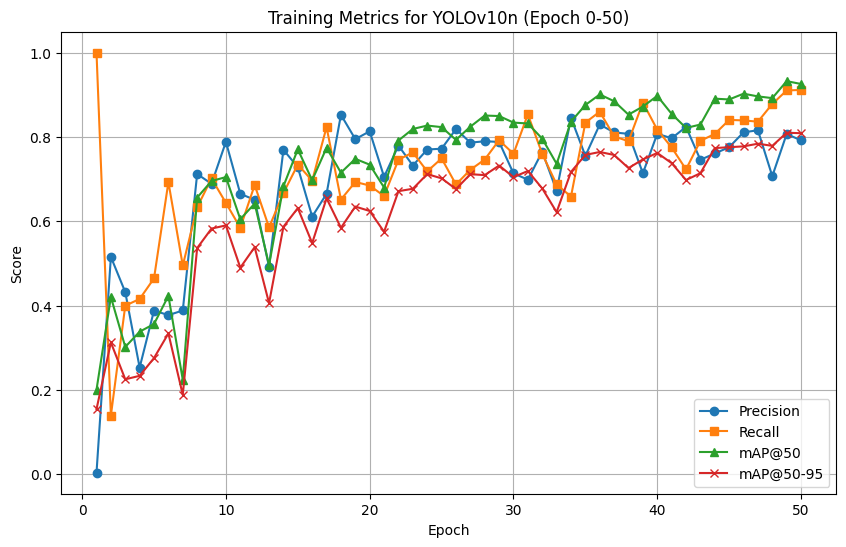

In [ ]:
# Path to the training log file
log_path = "runs/detect/train/results.csv"

# Load the training log
df = pd.read_csv(log_path)

# Strip leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Select columns for plotting
epochs = df["epoch"]
precision = df["metrics/precision(B)"]
recall = df["metrics/recall(B)"]
map50 = df["metrics/mAP50(B)"]
map5095 = df["metrics/mAP50-95(B)"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, precision, label="Precision", marker='o')
plt.plot(epochs, recall, label="Recall", marker='s')
plt.plot(epochs, map50, label="mAP@50", marker='^')
plt.plot(epochs, map5095, label="mAP@50-95", marker='x')

# Add title and labels
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Training Metrics for YOLOv10n (Epoch 0-50)")
plt.legend()
plt.grid()

# Show the plot
plt.show()

## Which epoch is in best.pt?

In [ ]:
# Load the training log
results = pd.read_csv("runs/detect/train/results.csv")

# Strip spaces
results.columns = results.columns.str.strip()

# Calculate fitness
results["fitness"] = results["metrics/mAP50(B)"] * 0.1 + results["metrics/mAP50-95(B)"] * 0.9

# Find the epoch with the highest fitness
best_epoch = results['fitness'].idxmax() + 1

print(f"Best model was saved at epoch: {best_epoch}")

Best model was saved at epoch: 49


source for the code above = https://github.com/ultralytics/ultralytics/issues/14137

# **Test Data**

In [ ]:
best_model_path = f"{HOME}/runs/detect/train/weights/best.pt"

In [ ]:
result = !yolo task=detect mode=val model={best_model_path} data={dataset.location}/data.yaml split=test

/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

In [ ]:
for line in result:
  print(line)

/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

In [ ]:
!yolo task=detect mode=predict \
model=/content/runs/detect/train/weights/best.pt \
source=/content/datasets/Herlev_dataset-3/test/images \
save=True

/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

## **Try Random Data**

In [ ]:
from ultralytics import YOLOv10
import supervision as sv # import supervision library and alias as 'sv'

model = YOLOv10(f'{HOME}/runs/detect/train/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo( # Now sv is defined and accessible
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.



0: 576x640 1 Abnormal, 1 Normal, 73.6ms
Speed: 15.4ms preprocess, 73.6ms inference, 209.4ms postprocess per image at shape (1, 3, 576, 640)


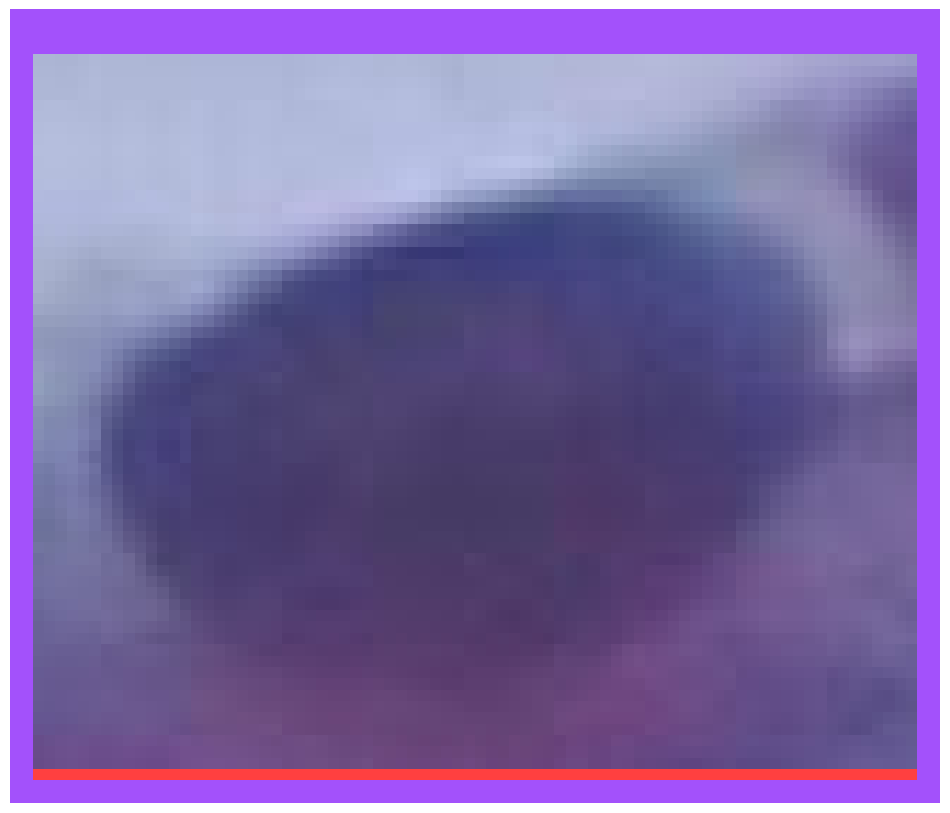

In [ ]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

# **Save Results**

In [ ]:
!zip -r results.zip /content/runs/detect/
from google.colab import files
files.download('results.zip')

updating: content/runs/detect/ (stored 0%)
updating: content/runs/detect/train/ (stored 0%)
updating: content/runs/detect/train/F1_curve.png (deflated 11%)
updating: content/runs/detect/train/results.csv (deflated 84%)
updating: content/runs/detect/train/train_batch1440.jpg (deflated 17%)
updating: content/runs/detect/train/train_batch1442.jpg (deflated 14%)
updating: content/runs/detect/train/train_batch0.jpg (deflated 8%)
updating: content/runs/detect/train/val_batch2_pred.jpg (deflated 12%)
updating: content/runs/detect/train/confusion_matrix_normalized.png (deflated 31%)
updating: content/runs/detect/train/train_batch1.jpg (deflated 9%)
updating: content/runs/detect/train/events.out.tfevents.1741152531.c00bb82cbc3e.1545.0 (deflated 90%)
updating: content/runs/detect/train/val_batch0_labels.jpg (deflated 19%)
updating: content/runs/detect/train/labels.jpg (deflated 48%)
updating: content/runs/detect/train/train_batch2.jpg (deflated 8%)
updating: content/runs/detect/train/P_curve.png

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r datasets.zip /content/datasets/
files.download('datasets.zip')

  adding: content/datasets/ (stored 0%)
  adding: content/datasets/Herlev_dataset-3/ (stored 0%)
  adding: content/datasets/Herlev_dataset-3/train/ (stored 0%)
  adding: content/datasets/Herlev_dataset-3/train/labels/ (stored 0%)
  adding: content/datasets/Herlev_dataset-3/train/labels/228_jpg.rf.cf2e9a8faf2b07ea15fcd6d9e67f2814.txt (deflated 32%)
  adding: content/datasets/Herlev_dataset-3/train/labels/418_jpg.rf.fa65a8cdd1bb0f33234d766b694bd79e.txt (deflated 29%)
  adding: content/datasets/Herlev_dataset-3/train/labels/215_jpg.rf.8576bee7328953b18c7c2de749976235.txt (deflated 33%)
  adding: content/datasets/Herlev_dataset-3/train/labels/104_jpg.rf.9e130c1a0650e507b74aa5d268f04396.txt (deflated 35%)
  adding: content/datasets/Herlev_dataset-3/train/labels/105_jpg.rf.8d24de3c63009adb248ca716331e3b38.txt (deflated 29%)
  adding: content/datasets/Herlev_dataset-3/train/labels/202_jpg.rf.80cdafb0889b1c8efc3b7ac8d078bec0.txt (deflated 35%)
  adding: content/datasets/Herlev_dataset-3/train/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r wandb.zip /content/wandb/
files.download('wandb.zip')

  adding: content/wandb/ (stored 0%)
  adding: content/wandb/debug-internal.log (deflated 74%)
  adding: content/wandb/latest-run/ (stored 0%)
  adding: content/wandb/latest-run/tmp/ (stored 0%)
  adding: content/wandb/latest-run/tmp/code/ (stored 0%)
  adding: content/wandb/latest-run/files/ (stored 0%)
  adding: content/wandb/latest-run/files/media/ (stored 0%)
  adding: content/wandb/latest-run/files/media/images/ (stored 0%)
  adding: content/wandb/latest-run/files/media/images/train_batch1_1_8852879968cace74cab0.jpg (deflated 9%)
  adding: content/wandb/latest-run/files/media/images/val_batch1_labels_50_467c9eabd2d0ff1ca467.jpg (deflated 18%)
  adding: content/wandb/latest-run/files/media/images/train_batch1440_41_29838986f1b42ccd490d.jpg (deflated 17%)
  adding: content/wandb/latest-run/files/media/images/confusion_matrix_normalized_50_f565182997289f9b74cc.png (deflated 31%)
  adding: content/wandb/latest-run/files/media/images/labels_1_27161583fe6d30c7cfe8.jpg (deflated 48%)
  a

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r weightsYOLOv10.zip /content/weights/
files.download('weightsYOLOv10.zip')

  adding: content/weights/ (stored 0%)
  adding: content/weights/yolov10l.pt (deflated 41%)
  adding: content/weights/yolov10x.pt (deflated 41%)
  adding: content/weights/yolov10m.pt (deflated 41%)
  adding: content/weights/yolov10n.pt (deflated 41%)
  adding: content/weights/yolov10b.pt (deflated 41%)
  adding: content/weights/yolov10s.pt (deflated 41%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>